# Health Insurance Cross Sell Prediction 

## Predict Health Insurance Owners' who will be interested in Vehicle Insurance

### Description:- 
Our client is a leading Health Insurance provider in the market, and they want to expand their business to offer Vehicle Insurance as well. They have a large customer base of policyholders from the past year, and they want to identify which of these policyholders are likely to be interested in purchasing Vehicle Insurance from their company

### Responsibility:-
•	Understood and analyzed the client requirements by interacted with client at various levels.
•	Evaluating clients data, Discover insights from that data to understand client consumer behavior.
•	Build data pipelines to prepare data for rapid learning in a scalable manner. 

•	Design and build machine learning and data infrastructure by partnering with data engineering teams.
•	Worked on Data pre-processing stage, selecting appropriate algorithms, model training and evaluating model performance


Logistic Regression
Decision Tree
Random Forest
KNN classifier
svm

# import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# data collection

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [4]:
test_df = pd.read_csv("test.csv")
test_df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199


# EDA

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [89]:
train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [90]:
test_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [91]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [92]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [93]:
train_df["id"].nunique()  # this column is uniqu so we will drop

381109

In [94]:
train_df["Gender"].nunique()

2

In [95]:
train_df["Age"].nunique()

66

In [96]:
train_df["Driving_License"].nunique()

2

In [97]:
train_df["Region_Code"].nunique()

53

In [98]:
train_df["Previously_Insured"].nunique()

2

In [99]:
train_df["Vehicle_Age"].nunique()

3

In [100]:
train_df["Vehicle_Damage"].nunique()

2

In [101]:
train_df["Annual_Premium"].nunique()

48838

In [102]:
train_df["Policy_Sales_Channel"].nunique()

155

In [103]:
train_df["Vintage"].nunique()

290

In [104]:
train_df["Response"].nunique()

2

In [105]:
# object to int
# label enconding
train_df.select_dtypes(include=object).nunique()

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64

In [106]:
train_df["Gender"].value_counts().to_dict()

{'Male': 206089, 'Female': 175020}

In [107]:
train_df["Gender"].replace({'Male': 1, 'Female': 0},inplace=True)

In [108]:
train_df["Vehicle_Age"].value_counts().to_dict()

{'1-2 Year': 200316, '< 1 Year': 164786, '> 2 Years': 16007}

In [109]:
train_df["Vehicle_Age"].replace({'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2},inplace=True)

In [110]:
train_df["Vehicle_Damage"].value_counts().to_dict()

{'Yes': 192413, 'No': 188696}

In [111]:
train_df["Vehicle_Damage"].replace({'Yes': 1, 'No': 0},inplace=True)

In [112]:
train_df.select_dtypes(include=object).nunique()

Series([], dtype: float64)

In [ ]:
# check for correlation

<AxesSubplot:>

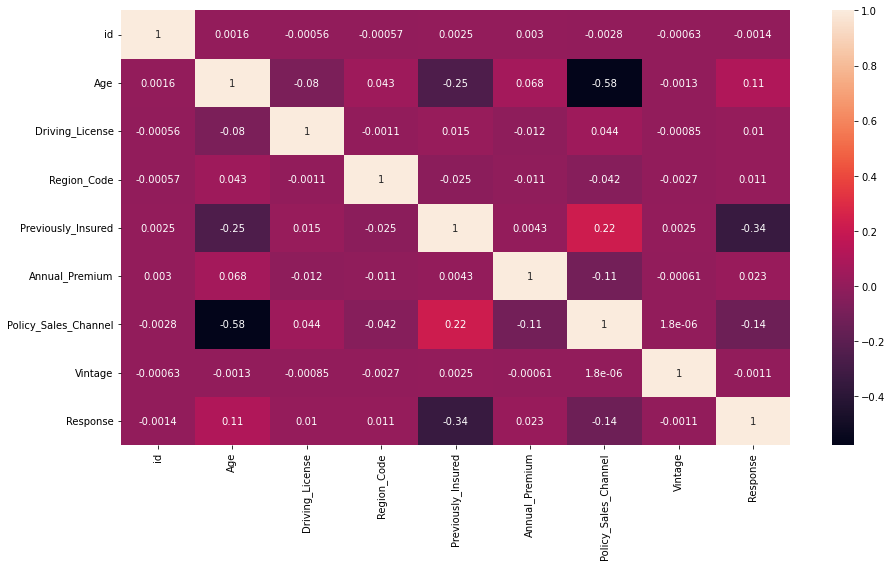

In [7]:
plt.figure(figsize=(15,8))
plt.subplot()
sns.heatmap(train_df.corr(),annot=True)

# to detect outliers
z_score
IQR
boxplot
scatterplot

In [113]:
from scipy.stats import zscore

<AxesSubplot:>

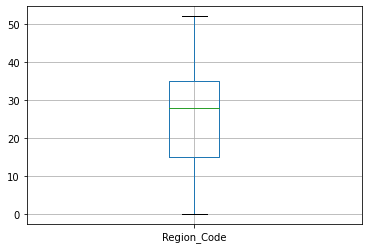

In [114]:
train_df[["Region_Code"]].boxplot()

<AxesSubplot:>

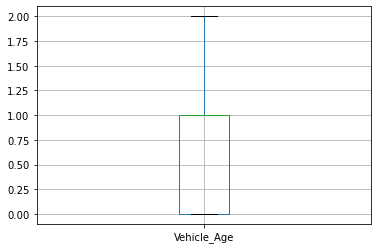

In [115]:
train_df[["Vehicle_Age"]].boxplot()

<AxesSubplot:>

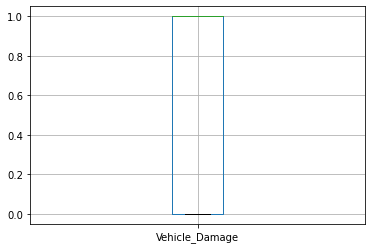

In [116]:
train_df[["Vehicle_Damage"]].boxplot()

<AxesSubplot:>

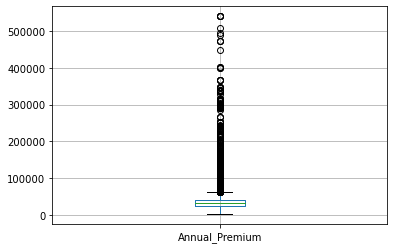

In [117]:
train_df[["Annual_Premium"]].boxplot()

<AxesSubplot:>

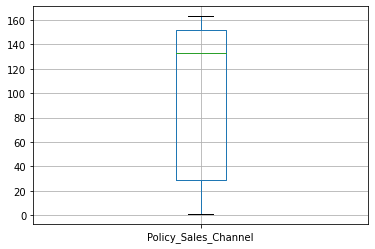

In [118]:
train_df[["Policy_Sales_Channel"]].boxplot()

<AxesSubplot:>

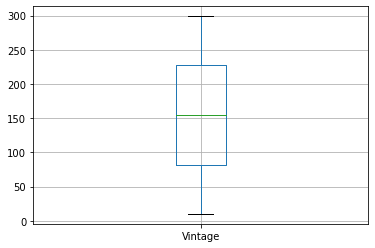

In [119]:
train_df[["Vintage"]].boxplot()

<AxesSubplot:>

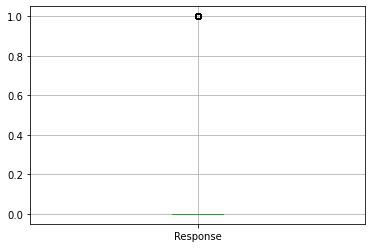

In [120]:
train_df[["Response"]].boxplot()

<AxesSubplot:xlabel='Gender'>

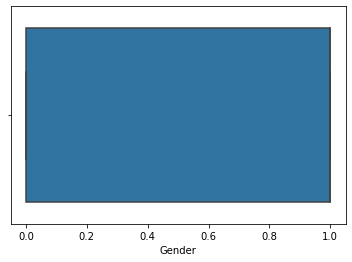

In [121]:
sns.boxplot(x=train_df["Gender"])

<AxesSubplot:xlabel='Driving_License'>

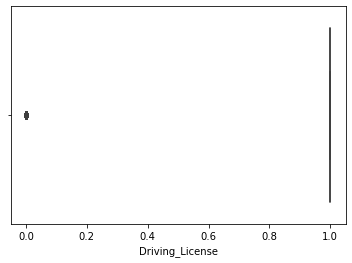

In [122]:
sns.boxplot(x=train_df["Driving_License"])

In [123]:
# detect outliers using z_score

In [124]:
z_score = zscore(train_df["Annual_Premium"])
threshold = 3 
index = np.where(np.abs(z_score) > threshold)[0]
index 

array([   167,    176,    315, ..., 380313, 380815, 380998], dtype=int64)

In [125]:
train_df["Annual_Premium"].iloc[index]

167        89282.0
176       101021.0
315        82705.0
401        90789.0
429       119735.0
            ...   
379812     93221.0
380119     92283.0
380313     95453.0
380815     91305.0
380998    101664.0
Name: Annual_Premium, Length: 2083, dtype: float64

In [126]:
# near to 2000 values in annual premiu column is outliers

# to handle outliers
1. Delete observations(Not preferable)
2. Imputation Techniques:
    1. median
    2. mean
    3. zero
    4. minimum
    5. maximum
    6. lower tail
    7. upper tail
    
3. Transformation
    1. log transformation
    2. Cube root
    3. Square Root
    4. Reciprocal
    5. Standardization 

In [127]:
median_ann_premium = train_df["Annual_Premium"].median()  # here we replace outlirs by median value
median_ann_premium

31669.0

In [128]:
train_df["Annual_Premium"].iloc[index] = median_ann_premium

C:\Users\Lakhan\AppData\Local\Temp\ipykernel_14728\4165647381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Annual_Premium"].iloc[index] = median_ann_premium


In [129]:
train_df["Annual_Premium"]

0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
381104    30170.0
381105    40016.0
381106    35118.0
381107    44617.0
381108    41777.0
Name: Annual_Premium, Length: 381109, dtype: float64

<AxesSubplot:>

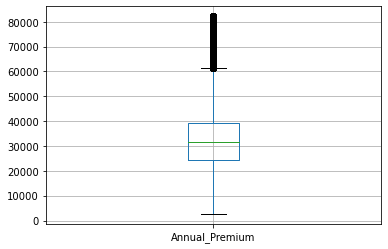

In [130]:
train_df[["Annual_Premium"]].boxplot()

# train test split

In [131]:
train_df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0


In [132]:
x = train_df.drop("Response",axis=1)
y = train_df["Response"]

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [185]:
import time

In [188]:
start = time.time()

rf_model = RandomForestClassifier()    #13:18 - 13:20  # takes 2 min
rf_model.fit(x_train,y_train)

end = time.time()

total = end-start
print(total)

147.10261058807373


# LOGISTIC REGRESSION Modelling

In [136]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

In [140]:
# training data evaluation , evaluation matrix, accuracyscore, classification report, precision,recall, 

y_pred = log_clf.predict(x_train)

accu_score = accuracy_score(y_pred,y_train)

clf_report = classification_report(y_pred,y_train)

conf_matrix = confusion_matrix(y_pred,y_train)

print("Training accuracy score: \n",accu_score)
print("\n Training classification_report: \n",clf_report)
print("Training confusion_matrix: \n",conf_matrix)

# testing data evaluation , evaluation matrix, accuracyscore, classification report, precision,recall, 

y_pred_test = log_clf.predict(x_test)

accu_score = accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)

conf_matrix = confusion_matrix(y_pred_test,y_test)

print("Testing accuracy score: \n",accu_score)
print("\n Testing classification_report: \n",clf_report)
print("Testing confusion_matrix: \n",conf_matrix)



C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy score: 
 0.8773296108539661

 Training classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93    285831
           1       0.00      0.00      0.00         0

    accuracy                           0.88    285831
   macro avg       0.50      0.44      0.47    285831
weighted avg       1.00      0.88      0.93    285831

Training confusion_matrix: 
 [[250768  35063]
 [     0      0]]
Testing accuracy score: 
 0.877757719515523

 Testing classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93     95278
           1       0.00      0.00      0.00         0

    accuracy                           0.88     95278
   macro avg       0.50      0.44      0.47     95278
weighted avg       1.00      0.88      0.93     95278

Testing confusion_matrix: 
 [[83631 11647]
 [    0     0]]


C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lakhan\AppDat

In [ ]:
# checking for balanced or inbalance

In [146]:
y.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [147]:
46710/381109*100              # class 1 is 12% ..so it is highly inbalanced data 

12.256336113815209

In [ ]:
# we will aplly smote to balance this data

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
smt = SMOTE(sampling_strategy=0.7)
x_sample, y_sample = smt.fit_resample(x,y)

In [150]:
y_sample.value_counts()

0    334399
1    234079
Name: Response, dtype: int64

In [152]:
234079/568478*100  # class 1 is 41 %

41.176439545593674

# train test split after balancing

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x_sample,y_sample, test_size=0.25,random_state=10)

# modelling logistic regression

In [154]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

In [155]:
# training data evaluation , evaluation matrix, accuracyscore, classification report, precision,recall, 

y_pred = log_clf.predict(x_train)

accu_score = accuracy_score(y_pred,y_train)

clf_report = classification_report(y_pred,y_train)

conf_matrix = confusion_matrix(y_pred,y_train)

print("Training accuracy score: \n",accu_score)
print("\n Training classification_report: \n",clf_report)
print("Training confusion_matrix: \n",conf_matrix)

# testing data evaluation , evaluation matrix, accuracyscore, classification report, precision,recall, 

y_pred_test = log_clf.predict(x_test)

accu_score = accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)

conf_matrix = confusion_matrix(y_pred_test,y_test)

print("Testing accuracy score: \n",accu_score)
print("\n Testing classification_report: \n",clf_report)
print("Testing confusion_matrix: \n",conf_matrix)



Training accuracy score: 
 0.5823369093578635

 Training classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.62      0.68    306294
           1       0.33      0.49      0.40    120064

    accuracy                           0.58    426358
   macro avg       0.55      0.55      0.54    426358
weighted avg       0.64      0.58      0.60    426358

Training confusion_matrix: 
 [[189555 116739]
 [ 61335  58729]]
Testing accuracy score: 
 0.5817056009006474

 Testing classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.62      0.68    102049
           1       0.33      0.49      0.40     40071

    accuracy                           0.58    142120
   macro avg       0.54      0.55      0.54    142120
weighted avg       0.64      0.58      0.60    142120

Testing confusion_matrix: 
 [[63055 38994]
 [20454 19617]]


# scaling 

In [158]:
std_scaler = StandardScaler()
std_array = std_scaler.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns= x.columns)
x_train_std.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1.631138,-0.971036,-0.368163,0.045218,0.121901,-0.665797,0.642008,0.726388,1.224801,0.299282,-1.615521
1,-1.589236,-0.971036,-0.013024,0.045218,0.121901,-0.665797,0.642008,0.726388,0.564434,0.342551,0.540437
2,1.193323,1.029828,0.271088,0.045218,0.368816,-0.665797,0.642008,0.726388,-1.740466,-1.830302,-0.052136
3,-0.747803,-0.971036,0.626227,0.045218,-0.588087,-0.665797,-1.211708,0.726388,-1.740466,-1.400987,1.221267
4,-0.847100,-0.971036,-0.936387,0.045218,-0.961066,-0.665797,0.642008,-1.376675,-1.740466,0.981066,1.725584


In [159]:
std_array = std_scaler.transform(x_test)
x_test_std = pd.DataFrame(std_array, columns= x.columns)
x_test_std.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.966915,-0.971036,-0.439191,0.045218,0.232902,-0.665797,-1.211708,0.726388,-1.740466,0.991539,0.805204
1,1.549234,-0.971036,-1.078442,0.045218,0.121901,-0.665797,-1.211708,0.726388,1.245578,-1.507891,0.023512
2,1.132877,-0.971036,-1.078442,0.045218,-1.606503,1.501960,-1.211708,-1.376675,0.505130,0.881745,1.826448
3,0.345380,1.029828,0.910339,0.045218,0.121901,-0.665797,0.642008,-1.376675,0.906031,0.350715,1.801232
4,-0.985422,1.029828,0.839311,0.045218,-1.194978,1.501960,0.642008,-1.376675,-0.133040,0.350715,1.284306


In [160]:
# training data evaluation , evaluation matrix, accuracyscore, classification report, precision,recall, 

y_pred = log_clf.predict(x_train_std)

accu_score = accuracy_score(y_pred,y_train)

clf_report = classification_report(y_pred,y_train)

conf_matrix = confusion_matrix(y_pred,y_train)

print("Training accuracy score: \n",accu_score)
print("\n Training classification_report: \n",clf_report)
print("Training confusion_matrix: \n",conf_matrix)

# testing data evaluation , evaluation matrix, accuracyscore, classification report, precision,recall, 

y_pred_test = log_clf.predict(x_test_std)

accu_score = accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)

conf_matrix = confusion_matrix(y_pred_test,y_test)

print("Testing accuracy score: \n",accu_score)
print("\n Testing classification_report: \n",clf_report)
print("Testing confusion_matrix: \n",conf_matrix)

Training accuracy score: 
 0.6328343786207835

 Training classification_report: 
               precision    recall  f1-score   support

           0       0.60      0.73      0.66    206778
           1       0.68      0.54      0.60    219580

    accuracy                           0.63    426358
   macro avg       0.64      0.64      0.63    426358
weighted avg       0.64      0.63      0.63    426358

Training confusion_matrix: 
 [[150562  56216]
 [100328 119252]]
Testing accuracy score: 
 0.6341753447790599

 Testing classification_report: 
               precision    recall  f1-score   support

           0       0.60      0.73      0.66     69058
           1       0.68      0.55      0.61     73062

    accuracy                           0.63    142120
   macro avg       0.64      0.64      0.63    142120
weighted avg       0.64      0.63      0.63    142120

Testing confusion_matrix: 
 [[50288 18770]
 [33221 39841]]


# KNN

In [163]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_std,y_train)

KNeighborsClassifier()

In [165]:
knn_model.score(x_train_std,y_train)     # 15 min 

0.8815760464210828

In [169]:
knn_model.score(x_test_std,y_test)    # 5 min

0.8180762735716296

#  Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Decision Tree

In [171]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [172]:
# Testing data evaluation
y_pred = dt_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Testing AccuracyScore :", acc)

# Training data evaluation
y_pred = dt_model.predict(x_train)

acc = accuracy_score(y_train, y_pred)
print("Training AccuracyScore :", acc)

Testing AccuracyScore : 0.8621165212496482
Training AccuracyScore : 1.0


# Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [175]:
rf_model = RandomForestClassifier()    #13:18 - 13:20  # takes 2 min
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
# Testing data evaluation
y_pred = rf_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Testing AccuracyScore :", acc)

# Training data evaluation
y_pred = rf_model.predict(x_train)

acc = accuracy_score(y_train, y_pred)
print("Training AccuracyScore :", acc)

Testing AccuracyScore : 0.8837039121868844
Training AccuracyScore : 0.9999976545532159


In [ ]:
# to reduce overfitting

# HyperParameter Tunning

In [178]:
rf_model = RandomForestClassifier()
hyp = {"n_estimators":np.arange(10,200),
    "criterion":['gini','entropy'],
    "max_depth":np.arange(2,50),
    "min_samples_split":np.arange(5,25),
    "min_samples_leaf":np.arange(2,20),
    "max_features":['auto']}

In [179]:
rscv = RandomizedSearchCV(rf_model, hyp, cv = 5)  # 13:26 - 15 #  1.5 hours
rscv.fit(x_train, y_train)
rscv.best_estimator_

C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

RandomForestClassifier(criterion='entropy', max_depth=32, max_features='auto',
                       min_samples_leaf=4, min_samples_split=17,
                       n_estimators=183)

In [180]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=32, max_features='auto',
                       min_samples_leaf=4, min_samples_split=17,n_estimators=183)

rf_model.fit(x_train,y_train)                 # 15:28 -15:30 # 2-3 minutes

C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=32, max_features='auto',
                       min_samples_leaf=4, min_samples_split=17,
                       n_estimators=183)

In [181]:
# Testing data evaluation
y_pred = rf_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Testing AccuracyScore :", acc)

# Training data evaluation
y_pred = rf_model.predict(x_train)

acc = accuracy_score(y_train, y_pred)
print("Training AccuracyScore :", acc)

Testing AccuracyScore : 0.8777934140163243
Training AccuracyScore : 0.9291933070330567


In [183]:
s1 = pd.Series(rf_model.feature_importances_)
s1.index = x.columns

<AxesSubplot:>

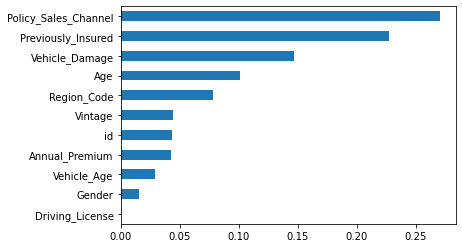

In [184]:
s1.sort_values().plot(kind = "barh")

In [ ]:
x_train.columns

In [ ]:
import pickle

In [ ]:
with open("rf_model.pkl","wb") as file:
    pickle.dump(rf_model, file)

In [ ]:
rf_model.predict(x_train)

In [ ]:
df_train.head(1)

In [ ]:
Gender=1
Age=44
Driving_License=1
Region_Code=28
Previously_Insured=0
Vehicle_Age=2
Vehicle_Damage=1
Annual_Premium=40454
Policy_Sales_Channel=26
Vintage=217

In [ ]:
array = [Gender, Age, Driving_License, Region_Code, Previously_Insured,
       Vehicle_Age, Vehicle_Damage, Annual_Premium,
       Policy_Sales_Channel, Vintage]

In [ ]:
# testing prediction

prediction = rf_model.predict([array])
prediction[0]

In [ ]:
# {"Gender":1,
# "Age": 44,
# "Driving_License":1,
# "Region_Code":28,
# "Previously_Insured":0,
# "Vehicle_Age":2,
# "Vehicle_Damage":1,
# "Annual_Premium":40454,
# "Policy_Sales_Channel":26,
# "Vintage" : 217}

In [ ]:
# {Gender:1,Age: 44,Driving_License:1,Region_Code:28,Previously_Insured:0,Vehicle_Age:2,Vehicle_Damage:1,Annual_Premium:40454,
# Policy_Sales_Channel:26,Vintage : 217}